In [1]:
from MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums

from MO_PPO_train_utils import load_saved_data
import itertools
from MORL_analysis_utils import generate_variable_name
from MORL_analysis_utils import plot_multiple_subplots
import itertools
import numpy as np

c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\Lib\site-packages\grid2op\Backend\pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\python.exe -m pip install numba

  warnings.warn(


In [2]:
num_episodes_list = [25]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results"

In [3]:
loaded_data = {}
do_nothing = True
# Loop through all combinations of num_episodes and weights
for num_episodes, weights in itertools.product(num_episodes_list, weights_list):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params, donothing_reward_matrix, donothing_total_steps = load_saved_data(weights=weights, results_dir=results_dir, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights)
    actions_var_name = generate_variable_name("actions", num_episodes, weights)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights)
    if do_nothing == True:
        donothing_reward_var_name = generate_variable_name("donothing_reward_matrix", num_episodes, weights)
        donothing_total_steps_var_name = generate_variable_name("donothing_total_steps", num_episodes, weights)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps
    if do_nothing == True:
        loaded_data[donothing_reward_var_name] = donothing_reward_matrix
        loaded_data[donothing_total_steps_var_name] = donothing_total_steps

Loaded results from training_results\results_weights_1_0_0_episodes_25.npz
Loaded model from training_results\model_weights_1_0_0_episodes_25.pth
Loaded parameters from training_results\params_weights_1_0_0_episodes_25.json
Loaded DoNothing reward matrix from training_results\DoNothing_reward_matrix_25_episodes.npy
Loaded DoNothing total steps from training_results\DoNothing_total_steps_25_episodes.npy
Loaded results from training_results\results_weights_0_1_0_episodes_25.npz
Loaded model from training_results\model_weights_0_1_0_episodes_25.pth
Loaded parameters from training_results\params_weights_0_1_0_episodes_25.json
Loaded DoNothing reward matrix from training_results\DoNothing_reward_matrix_25_episodes.npy
Loaded DoNothing total steps from training_results\DoNothing_total_steps_25_episodes.npy
Loaded results from training_results\results_weights_0_0_1_episodes_25.npz
Loaded model from training_results\model_weights_0_0_1_episodes_25.pth
Loaded parameters from training_results\pa

In [4]:
loaded_data["donothing_reward_matrix_episodes_25_weights_0_0_1"]

array([[0.00000000e+00, 4.15678369e+02, 7.00000000e+02],
       [0.00000000e+00, 2.33150812e+02, 3.85000000e+02],
       [0.00000000e+00, 2.70435165e+02, 4.37000000e+02],
       [0.00000000e+00, 2.69137034e+02, 4.41000000e+02],
       [0.00000000e+00, 3.19528661e+02, 5.27000000e+02],
       [0.00000000e+00, 2.35225116e+02, 3.88000000e+02],
       [0.00000000e+00, 2.21878433e+02, 3.77000000e+02],
       [0.00000000e+00, 2.61193701e+02, 4.31000000e+02],
       [6.37400794e-02, 3.04535290e+02, 5.12000000e+02],
       [0.00000000e+00, 4.23439893e+02, 7.15000000e+02],
       [6.42361111e-02, 3.07360154e+02, 5.16000000e+02],
       [6.41121032e-02, 2.98239390e+02, 5.15000000e+02],
       [6.39880952e-02, 3.06473021e+02, 5.14000000e+02],
       [6.43601190e-02, 3.10300763e+02, 5.17000000e+02],
       [0.00000000e+00, 4.01692843e+02, 6.87000000e+02],
       [0.00000000e+00, 3.09514300e+02, 5.17000000e+02],
       [0.00000000e+00, 2.65519291e+02, 4.35000000e+02],
       [0.00000000e+00, 2.59269

In [5]:
loaded_data['total_steps_episodes_25_weights_1_0_0']

array([   6, 1143,    6, 1586,    6,  901, 2570, 1709,    3, 2142, 1035,
       2848, 1546,    1,    6,   15,   10,   10,    6,    3,   21,  827,
        769,   15,    3])

In [6]:
reward_matrix.shape

(25, 3)

In [7]:
def normalize_reward_matrix(reward_matrix,total_steps, EpisodeDur: bool=True):#EpisodeDuration: bool = True)
    
    normalized_reward_matrix = reward_matrix / total_steps[:, np.newaxis]
    if EpisodeDur==True: 
        normalized_reward_matrix[:,0] = reward_matrix[:,0]
    return normalized_reward_matrix

In [8]:
loaded_data.keys()

dict_keys(['reward_matrix_episodes_25_weights_1_0_0', 'actions_episodes_25_weights_1_0_0', 'total_steps_episodes_25_weights_1_0_0', 'donothing_reward_matrix_episodes_25_weights_1_0_0', 'donothing_total_steps_episodes_25_weights_1_0_0', 'reward_matrix_episodes_25_weights_0_1_0', 'actions_episodes_25_weights_0_1_0', 'total_steps_episodes_25_weights_0_1_0', 'donothing_reward_matrix_episodes_25_weights_0_1_0', 'donothing_total_steps_episodes_25_weights_0_1_0', 'reward_matrix_episodes_25_weights_0_0_1', 'actions_episodes_25_weights_0_0_1', 'total_steps_episodes_25_weights_0_0_1', 'donothing_reward_matrix_episodes_25_weights_0_0_1', 'donothing_total_steps_episodes_25_weights_0_0_1'])

In [16]:
normalized_reward_matrices = [normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_1_0_0'], loaded_data['total_steps_episodes_25_weights_1_0_0']),
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_0_1_0'], loaded_data['total_steps_episodes_25_weights_0_1_0']), 
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_25_weights_0_0_1'], loaded_data['total_steps_episodes_25_weights_0_0_1']),
                normalize_reward_matrix(loaded_data["donothing_reward_matrix_episodes_25_weights_1_0_0"], loaded_data["donothing_total_steps_episodes_25_weights_1_0_0"])
]

In [17]:
reward_matrices = [loaded_data['reward_matrix_episodes_25_weights_1_0_0'], loaded_data['reward_matrix_episodes_25_weights_0_1_0'], loaded_data['reward_matrix_episodes_25_weights_0_0_1'], loaded_data["donothing_reward_matrix_episodes_25_weights_1_0_0"] ]

In [15]:
normalized_reward_matrices[3]

NameError: name 'normalized_reward_matrices' is not defined

settings for loading the files

Input reward_matrix shape: (25, 3)
8.601547388781432 8.596710281761576 8.57178695484369
Input reward_matrix shape: (25, 3)
4.3203125 4.326437036308022 4.280211184982402
Input reward_matrix shape: (25, 3)
7.717850287907867 7.463633918470048 7.6811900191938545
Input reward_matrix shape: (25, 3)
4.978805394990366 7.378316515800928 7.061224489795918


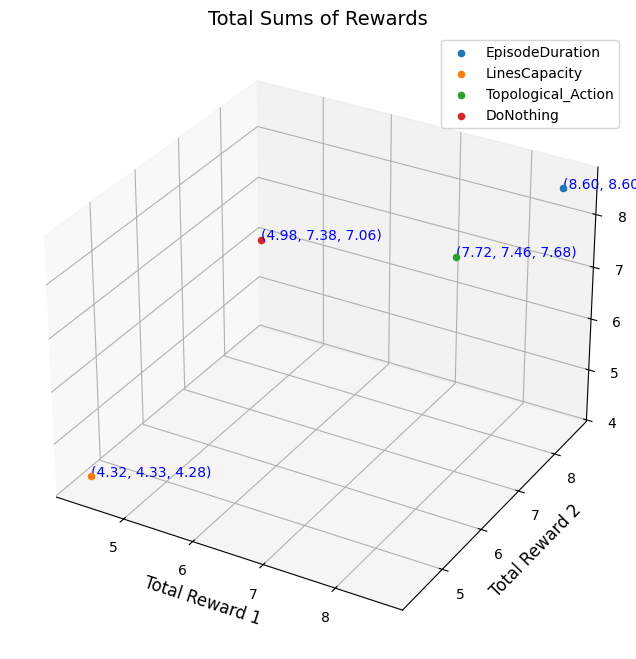

In [19]:
plot_total_sums(reward_matrices=reward_matrices, labels=['EpisodeDuration', 'LinesCapacity', 'Topological_Action', 'DoNothing'])

Input reward_matrix shape: (0,)


IndexError: tuple index out of range

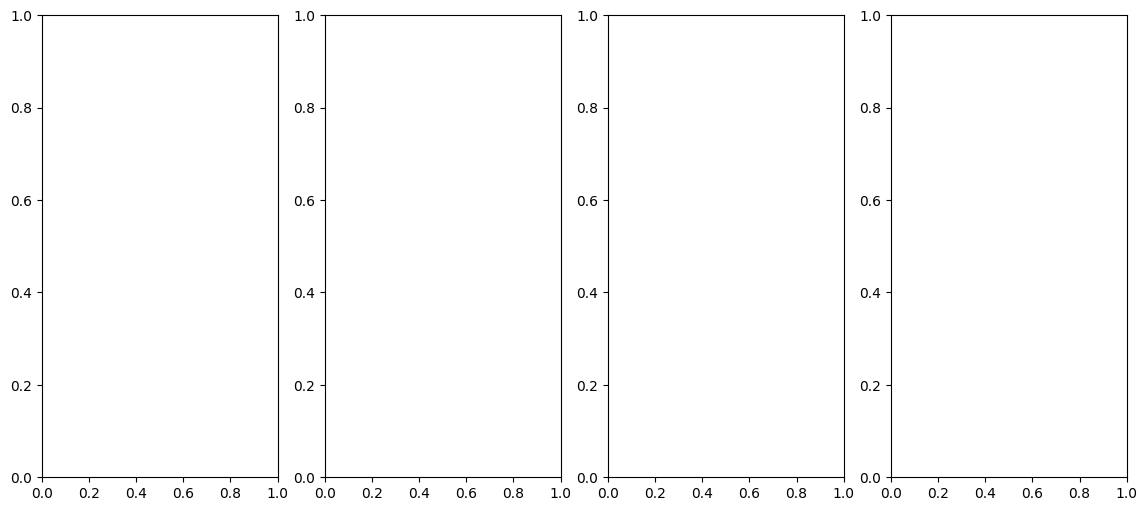

In [11]:
plot_multiple_subplots(reward_matrices=reward_matrices, summed_episodes=200)

In [ ]:
import matplotlib.pyplot as plt

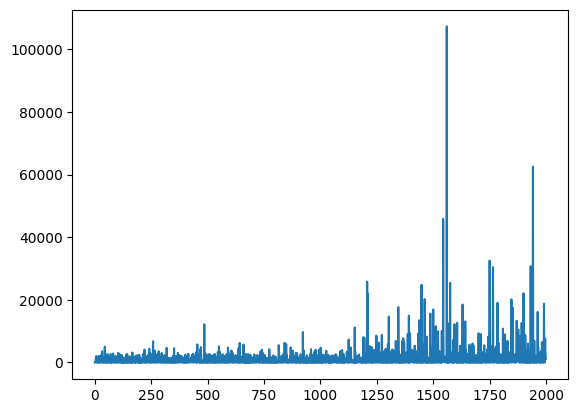

In [ ]:
plt.plot(total_steps)